In [1]:
import numpy as np
import matplotlib.pyplot as plt

from run_utils_pap import RunParams, create_run_funcs, create_input, do_single_run,disturb_input


To generate figures 2 and 3 from the paper, just click 'Run All' and scroll down.

In [2]:
np.random.seed(3) #fix random number generator seed for reproducibility 

#number of neural activations
n = 20 

W_nn = None

#determine the noise level in simulation
sigma = 1e-8

#step size to be used in numerical integration
dt = 1e-2 

#duration of simulation
T = 10

#time points in simulation
tspan = np.arange(0.0, T, dt)

disturb_region = tspan[int(tspan.shape[0] /2):int(tspan.shape[0] /2) +100] /dt

#model neural and synapse
neurs_show = [10,56] 

#create input into neural activations
uts1 = create_input(n,tspan)
uts2 = disturb_input(n,tspan,uts1)

#instantiate run parameters object
RunParamsObj1 = RunParams(n, W_nn, tspan, sigma, uts1,dt)
RunParamsObj2 = RunParams(n, W_nn, tspan, sigma, uts2,dt)


#define network evolution equations
f1,G1 = create_run_funcs(RunParamsObj1)
f2,G2 = create_run_funcs(RunParamsObj2)

#initial conditions for two different simulations
x01 = np.random.uniform(-1,1, n + n**2) 
x02 = np.random.uniform(-1,1, n + n**2) 

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(25,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.02)

In [4]:
#generate two different initial conditions, same input

#create input into neural activations
uts2 = uts1

#instantiate run parameters object
RunParamsObj1 = RunParams(n, W_nn, tspan, sigma, uts1,dt)
RunParamsObj2 = RunParams(n, W_nn, tspan, sigma, uts2,dt)


#define network evolution equations
f1,G1 = create_run_funcs(RunParamsObj1)
f2,G2 = create_run_funcs(RunParamsObj2)

#initial conditions for two different simulations
x01 = np.random.uniform(-1,1, n + n**2) 
x02 = np.random.uniform(-1,1, n + n**2) 


#run the simulations
result1 = do_single_run(f1,G1,RunParamsObj1,x01, dense_output = False)
result2 = do_single_run(f2,G2,RunParamsObj2,x02, dense_output = False)

#plot neurons from two sims
ax[0,0].plot(result1[:,neurs_show[0]],'k')
ax[0,0].plot(result2[:,neurs_show[0]],'k:')

#plot synapses from two sims
ax[0,0].plot(result1[:,neurs_show[1]],'b')
ax[0,0].plot(result2[:,neurs_show[1]],'b:')

ax[0,0].set_ylim([-2,2.5])
ax[0,0].set_xlim([0,1000])

csfont = {'fontname':'Arial'}
ax[0,0].set_title('Contraction + Disturbance',fontsize=20,**csfont)
ax[0,0].set_ylabel('Activation Levels',fontsize=20,**csfont)
ax[0,0].legend(['Neural Activation Trial 1','Neural Activation Trial 2','Synaptic Activation Trial 1','Synaptic Activation Trial 2'])

diff_vec = result1-result2
dist_vec = np.mean(diff_vec**2,axis = 1)
ax[1,0].plot(dist_vec,linewidth=3)
ax[1,0].set_ylim([0,.6])
ax[1,0].set_xlim([0,1000])

ax[1,0].set_xlabel('Time (a.u)',fontsize=20,**csfont)
ax[1,0].set_ylabel('Distance Between Trajectories',fontsize=20,**csfont)


  


Doing one run.
Doing one run.


Text(0,0.5,'Distance Between Trajectories')

In [5]:
#generate two different initial conditions, same input, disturbance on one trial

#create input into neural activations
uts2 = disturb_input(n,tspan,uts1)

#instantiate run parameters object
RunParamsObj1 = RunParams(n, W_nn, tspan, sigma, uts1,dt)
RunParamsObj2 = RunParams(n, W_nn, tspan, sigma, uts2,dt)


#define network evolution equations
f1,G1 = create_run_funcs(RunParamsObj1)
f2,G2 = create_run_funcs(RunParamsObj2)

#initial conditions for two different simulations
#x01 = np.random.uniform(-1,1, n + n**2) 
#x02 = np.random.uniform(-1,1, n + n**2) 


#run the simulations
result1 = do_single_run(f1,G1,RunParamsObj1,x01, dense_output = False)
result2 = do_single_run(f2,G2,RunParamsObj2,x02, dense_output = False)

ax[0,1].axvspan(int(disturb_region[0]), int(disturb_region[-1]), ymin=-2, ymax=2.5, alpha=0.1, color='red')

#plot neurons from two sims
ax[0,1].plot(result1[:,neurs_show[0]],'k')
ax[0,1].plot(result2[:,neurs_show[0]],'k:')

#plot synapses from two sims
ax[0,1].plot(result1[:,neurs_show[1]],'b')
ax[0,1].plot(result2[:,neurs_show[1]],'b:')

ax[0,1].set_ylim([-2,2.5])
ax[0,1].set_xlim([0,1000])

csfont = {'fontname':'Arial'}
ax[0,1].set_title('Contraction + Disturbance',fontsize=20,**csfont)
ax[0,1].legend(['Neural Activation Trial 1','Neural Activation Trial 2','Synaptic Activation Trial 1','Synaptic Activation Trial 2'])


diff_vec = result1-result2
dist_vec = np.mean(diff_vec**2,axis = 1)
ax[1,1].axvspan(int(disturb_region[0]), int(disturb_region[-1]), ymin=-2, ymax=2.5, alpha=0.1, color='red')
ax[1,1].plot(dist_vec,linewidth=3)
ax[1,1].set_ylim([0,.6])
ax[1,1].set_xlim([0,1000])

ax[1,1].set_xlabel('Time (a.u)',fontsize=20,**csfont)





Doing one run.
Doing one run.


Text(0.5,0,'Time (a.u)')

Doing one run.
Doing one run.


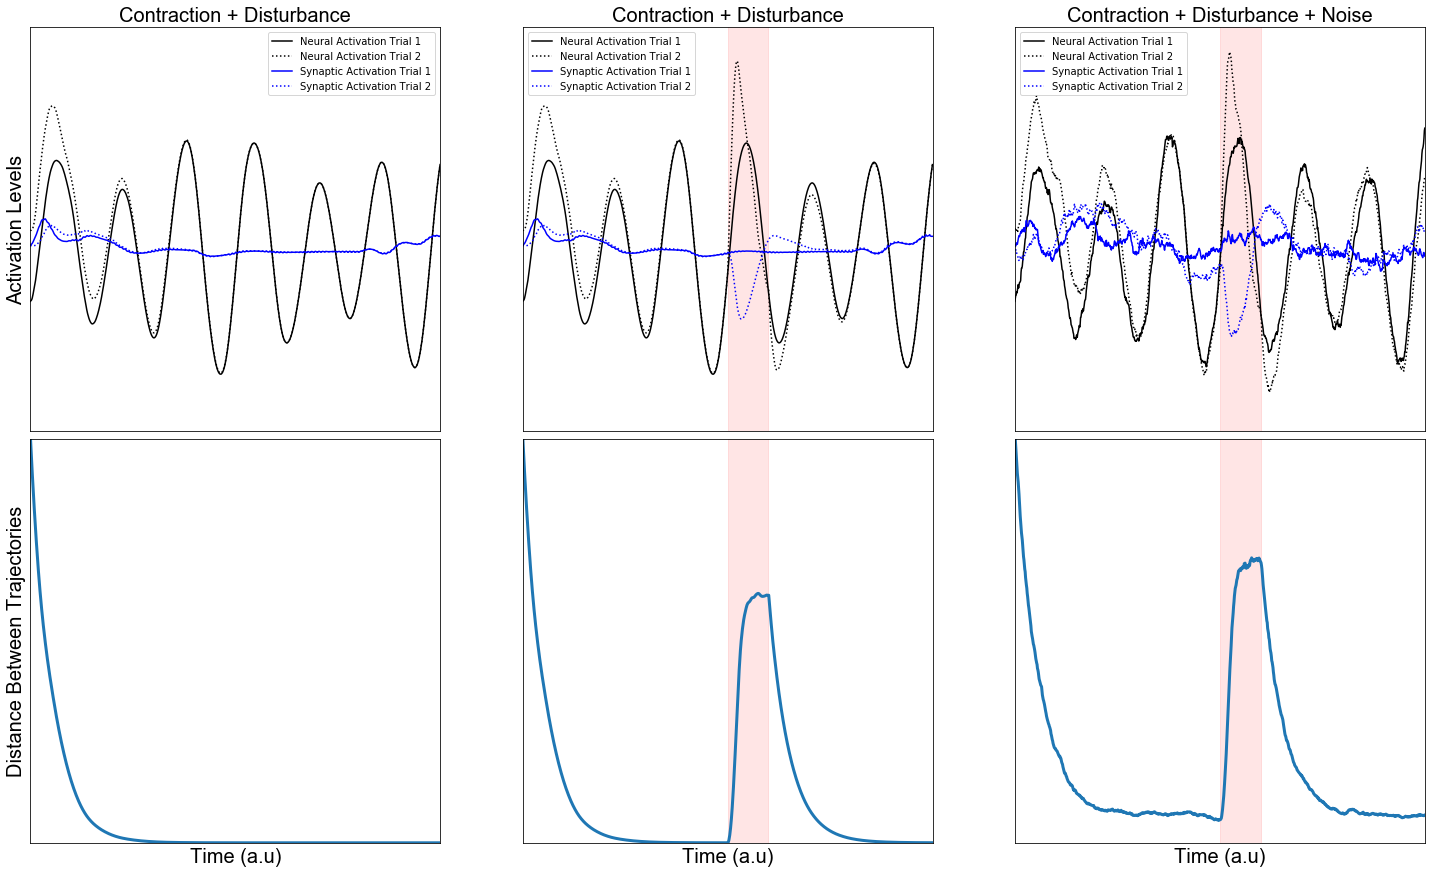

In [6]:
#generate two different initial conditions, same input, disturbance on one trial, noise

#create input into neural activations
uts2 = disturb_input(n,tspan,uts1)

#instantiate run parameters object
RunParamsObj1 = RunParams(n, W_nn, tspan, sigma, uts1,dt)
RunParamsObj2 = RunParams(n, W_nn, tspan, sigma, uts2,dt)


#define network evolution equations
f1,G1 = create_run_funcs(RunParamsObj1)
f2,G2 = create_run_funcs(RunParamsObj2)

#initial conditions for two different simulations
#x01 = np.random.uniform(-1,1, n + n**2) 
#x02 = np.random.uniform(-1,1, n + n**2) 

#noise level
RunParamsObj1.sigma = .2
RunParamsObj2.sigma = .2


#run the simulations
result1 = do_single_run(f1,G1,RunParamsObj1,x01, dense_output = False)
result2 = do_single_run(f2,G2,RunParamsObj2,x02, dense_output = False)



ax[0,2].axvspan(int(disturb_region[0]), int(disturb_region[-1]), ymin=-2, ymax=2.5, alpha=0.1, color='red')

#plot neurons from two sims
ax[0,2].plot(result1[:,neurs_show[0]],'k')
ax[0,2].plot(result2[:,neurs_show[0]],'k:')

#plot synapses from two sims
ax[0,2].plot(result1[:,neurs_show[1]],'b')
ax[0,2].plot(result2[:,neurs_show[1]],'b:')

ax[0,2].set_ylim([-2,2.5])
ax[0,2].set_xlim([0,1000])

csfont = {'fontname':'Arial'}
ax[0,2].set_title('Contraction + Disturbance + Noise',fontsize=20,**csfont)

ax[0,2].legend(['Neural Activation Trial 1','Neural Activation Trial 2','Synaptic Activation Trial 1','Synaptic Activation Trial 2'])

diff_vec = result1-result2
dist_vec = np.mean(diff_vec**2,axis = 1)
ax[1,2].axvspan(int(disturb_region[0]), int(disturb_region[-1]), ymin=-2, ymax=2.5, alpha=0.1, color='red')
ax[1,2].plot(dist_vec,linewidth=3)
ax[1,2].set_ylim([0,.6])
ax[1,2].set_xlim([0,1000])

ax[1,2].set_xlabel('Time (a.u)',fontsize=20,**csfont)



plt.setp(ax, xticks=[], yticks=[])
plt.plot()
plt.show()
#plt.savefig('Fig_2.png')

Doing one run.
Doing one run.


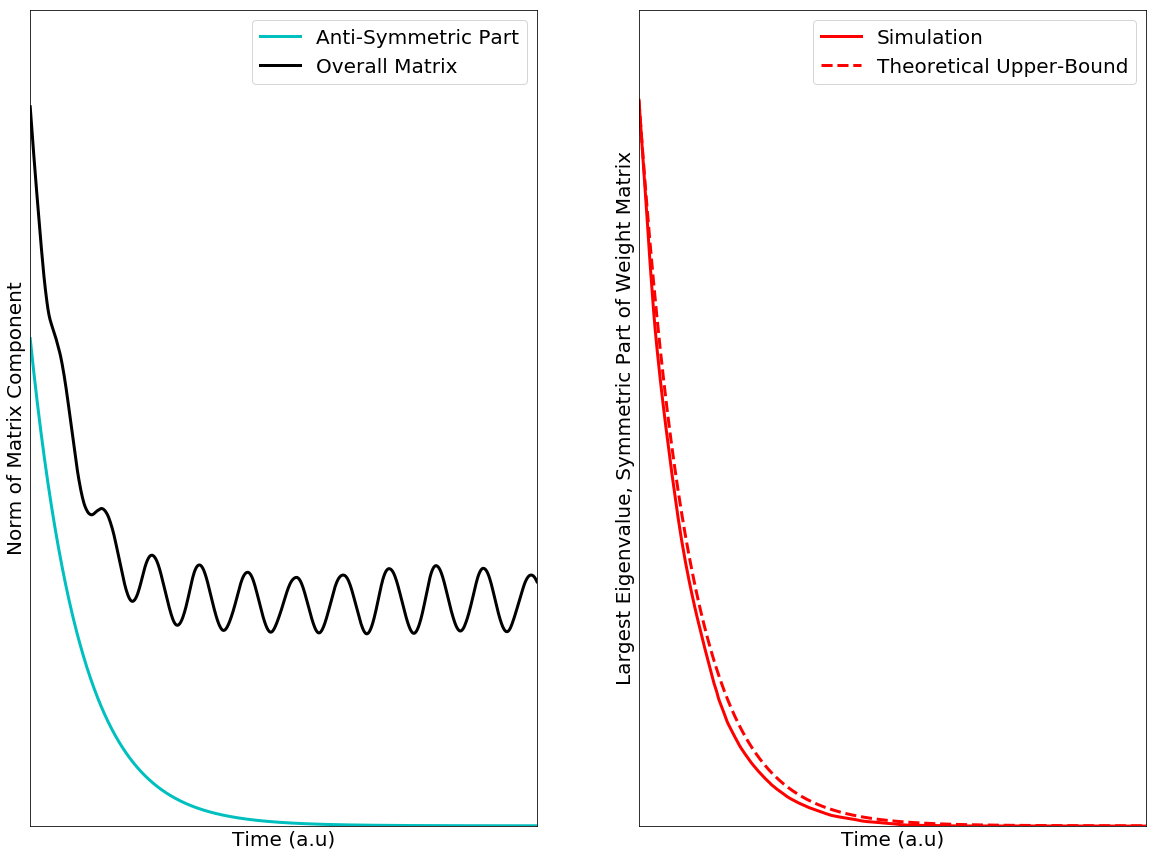

In [7]:
#Code to generate Figure 3


#generate two different initial conditions, same input

#create input into neural activations
uts2 = uts1

#instantiate run parameters object
RunParamsObj1 = RunParams(n, W_nn, tspan, sigma, uts1,dt)
RunParamsObj2 = RunParams(n, W_nn, tspan, sigma, uts2,dt)


#define network evolution equations
f1,G1 = create_run_funcs(RunParamsObj1)
f2,G2 = create_run_funcs(RunParamsObj2)

#initial conditions for two different simulations
x01 = np.random.uniform(-1,1, n + n**2) 
x02 = np.random.uniform(-1,1, n + n**2) 


#run the simulations
result1 = do_single_run(f1,G1,RunParamsObj1,x01, dense_output = False)
result2 = do_single_run(f2,G2,RunParamsObj2,x02, dense_output = False)


#for storage
w_asym_norm = np.zeros(tspan.size)
w_norm = np.zeros(tspan.size)
w_eig = np.zeros(tspan.size)

for t in np.arange(tspan.size):
    #reshape weights into matrix
    square_ws = np.reshape(result1[t,20::], (n,n))
    
    #get norm of anti-symmetric part, matrix, and largest (real part) eigenvalue of the symmetric part
    w_asym_norm[t] = np.linalg.norm(0.5*(square_ws - square_ws.T))
    w_norm[t] = np.linalg.norm(square_ws)
    w_eig[t] = np.max(np.linalg.eigvals(0.5*(square_ws + square_ws.T)))

    
theory_mu2 = w_eig[0]*np.exp(-tspan)    
    
#plot
plt.close()
fig3,axs3 = plt.subplots(1,2,figsize=(20,15))
axs3[0].plot(w_asym_norm,'c',linewidth=3)
axs3[0].plot(w_norm,'k',linewidth=3)
axs3[0].set_ylabel('Norm of Matrix Component',fontsize=20)
axs3[0].set_xlabel('Time (a.u)',fontsize=20)
axs3[0].legend(['Anti-Symmetric Part', 'Overall Matrix'],fontsize=20)
axs3[0].set_ylim([0,13])
axs3[0].set_xlim([0,1000])

axs3[1].plot(w_eig,'r',linewidth=3)
axs3[1].plot(theory_mu2,'r--',linewidth=3)
axs3[1].set_ylim([0,4])
axs3[1].set_xlim([0,1000])
axs3[1].set_ylabel('Largest Eigenvalue, Symmetric Part of Weight Matrix',fontsize=20)
axs3[1].set_xlabel('Time (a.u)',fontsize=20)
axs3[1].legend(['Simulation', 'Theoretical Upper-Bound'],fontsize=20)


plt.setp(axs3, xticks=[], yticks=[])
plt.plot() 
plt.show()